In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

2023-04-13 19:23:03.098772: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-13 19:23:03.100211: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-13 19:23:03.126047: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-13 19:23:03.126335: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 19:23:03.560553: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [4]:
# Output to csv file
import csv
path_csv = './'
file_names = ['/t20_tx10.csv', '/t8_tx10.csv', '/t8_tx15.csv']

# Read csv
rssi_data = []
snr_data = []
for name in file_names:
  with open(path_csv + name, 'r') as f:
    reader = csv.DictReader(f, delimiter=',')
    current_file_rssi = []
    current_file_snr = []
    for row in reader:
      current_file_rssi.append(float(row['rssi']))
      current_file_snr.append(float(row['snr']))
    rssi_data.append(current_file_rssi)
    snr_data.append(current_file_snr)

distance = np.arange(0, len(rssi_data[0])*3, 3)


In [5]:
distance

array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
        39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
        78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111, 114,
       117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153,
       156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192,
       195, 198, 201])

In [6]:
tx15 =  [15 for i in range(len(rssi_data[0]))]
tx10 =  [10 for i in range(len(rssi_data[0]))]

In [7]:
tx_15_8 = pd.DataFrame(list(zip(rssi_data[2], snr_data[2], tx15, distance)), columns=['rssi', 'snr', 'tx_power','distance'])
tx_10_8 = pd.DataFrame(list(zip(rssi_data[1], snr_data[1],  tx10, distance)), columns=['rssi', 'snr', 'tx_power','distance'])
tx_10 = pd.DataFrame(list(zip(rssi_data[0], snr_data[0],  tx10, distance)), columns=['rssi', 'snr', 'tx_power','distance'])
frames = [tx_15_8, tx_10_8, tx_10]
df = pd.concat(frames, ignore_index=True)
df

,rssi,snr,tx_power,distance
0,-34.666667,13.400000,15,0
1,-28.000000,12.066667,15,3
2,-54.333333,11.166667,15,6
3,-58.333333,12.166667,15,9
4,-67.333333,12.600000,15,12
...,...,...,...,...
191,-95.333333,6.466667,10,189
192,-106.333333,-7.533333,10,192
193,-104.333333,-8.200000,10,195
194,-102.666667,-4.866667,10,198


In [8]:
X = df.iloc[:,:3]
y = df.iloc[:,3:] 

In [9]:
reg = LinearRegression().fit(X, y)

In [10]:
reg.score(X, y)

0.520085161387698

In [11]:
train_dataset = df.sample(frac=0.8, random_state=91720)
test_dataset = df.drop(train_dataset.index)

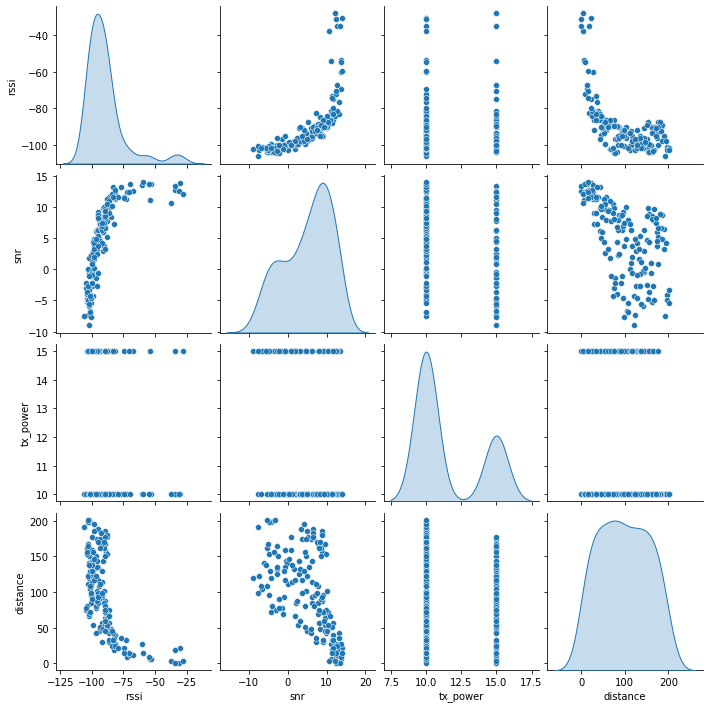

In [12]:
sns.pairplot(train_dataset[['rssi', 'snr', 'tx_power','distance']], diag_kind='kde')

<AxesSubplot:>

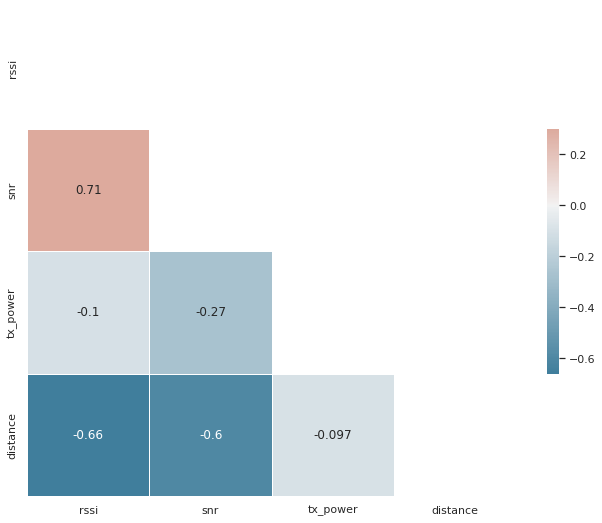

In [13]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [14]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rssi,157.0,-89.821656,15.281757,-106.333333,-99.666667,-93.333333,-87.666667,-28.0
snr,157.0,5.026539,6.086328,-9.000000,0.066667,6.400000,9.733333,14.0
tx_power,157.0,11.528662,2.310956,10.000000,10.000000,10.000000,15.000000,15.0
distance,157.0,97.796178,56.889427,0.000000,51.000000,96.000000,144.000000,201.0


In [15]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('distance')
test_labels = test_features.pop('distance')

In [16]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
rssi,-89.821656,15.281757
snr,5.026539,6.086328
tx_power,11.528662,2.310956
distance,97.796178,56.889427


2023-04-13 19:23:05.391638: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-13 19:23:05.392388: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


2/2 [==============================] - 0s 2ms/step


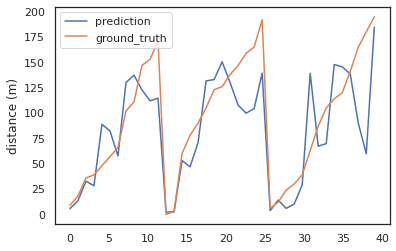

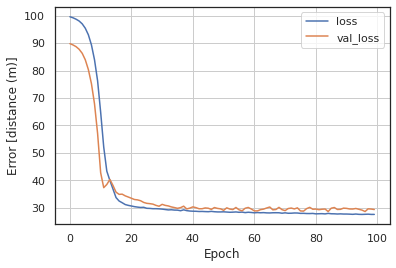

In [17]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [distance (m)]')
  plt.legend()
  plt.grid(True)
  
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(1, activation='linear')
  ])
  return model

  
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

model = build_and_compile_model(normalizer)
model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['mse','mae'])
history=model.fit(train_features,train_labels, epochs=100, batch_size=16, verbose=0, validation_split=0.2)
predictions = model.predict(test_features)


plt.plot(np.linspace(0, len(predictions), len(predictions)), predictions, label = "prediction")
plt.plot(np.linspace(0, len(test_labels), len(test_labels)), test_labels, label = "ground_truth")
plt.ylabel("distance (m)")
plt.legend()
plt.show()


plot_loss(history)

In [26]:
result = pd.DataFrame(list(zip(test_labels, predictions, [x - y for x, y in zip(test_labels, predictions)])), columns=['control', 'pred', 'diff'])
result

,control,pred,diff
0,9,[5.7100344],[3.2899656]
1,18,[13.529084],[4.470916]
2,36,[32.780243],[3.219757]
3,39,[28.292318],[10.707682]
4,48,[88.890335],[-40.890335]
5,57,[82.439476],[-25.439476]
6,66,[57.698048],[8.301952]
7,102,[130.1392],[-28.139206]
8,111,[137.3526],[-26.3526]
9,147,[122.797844],[24.202156]


In [ ]:
# model.save('rssi_to_distance')

In [ ]:
model.predict(test_features.iloc[0:1,:])

1/1 [==============================] - 0s 10ms/step


array([[6.757]], dtype=float32)

In [ ]:
a = test_features.iloc[0,1:]

In [ ]:
reloaded = tf.keras.models.load_model('rssi_to_distance')
data = {'rssi': -58.333333333333336, 'snr': 12.166666666666666, 'tx_power': 15.0}
data = pd.DataFrame(data, index=[0])
reloaded.predict(data)

1/1 [==============================] - 0s 35ms/step


array([[6.588]], dtype=float32)